# Amazon Analysis: Part two - Sentiment Analysis and Product Feature Extraction

In this portion of the project, we will analysis the reviews we scraped from Amazon. 

### Import packages

In [1]:
# basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# text clean 
import string 
import re


## EDA 
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


# text preprocessing  
import nltk
from nltk import word_tokenize 
from nltk.corpus import stopwords
nltk.download('stopwords')

# sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# feature extracting 
from nltk import pos_tag


### topic modeling - clusters
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofia2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('amazon_reviews.csv')

In [3]:
df.drop('product_link', axis = 1, inplace = True)

In [4]:
df.head()

,reviews
0,"\nOverall the masks are good, comfortable, sof..."
1,\ngood\n
2,\nThe quality of this mask is good but not the...
3,\nGood quality\n
4,\nGood product\n


In [5]:
df.head(100)

,reviews
0,"\nOverall the masks are good, comfortable, sof..."
1,\ngood\n
2,\nThe quality of this mask is good but not the...
3,\nGood quality\n
4,\nGood product\n
...,...
95,\nI like the product as it is up to the mark a...
96,\nGood quality\n
97,\nI have ordered the 2nd packTill now its very...
98,\nBest in the market...\n


## Clean text

In the section of the project, we will remove the stop words and clean the text of puncutions and convert it all to lowercase. 

In [55]:
stop_words = stopwords.words('english')
new_words = ['mask','masks','t']
stop_words = stop_words + new_words


def clean_text(text):
    """ convert input to string, remove hypens, remove punctuation, lowercase the text, remove new line code (/n)"""
    text = str(text)
    text = text.replace("-"," ")
    text =  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.lower()
    text = text.strip('\n')
    return text

df['reviews_clean'] = df.reviews.apply(clean_text)
df['reviews_clean'] = df['reviews_clean'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


In [56]:
df.head()

,reviews,reviews_clean,score,compound,sentiment
0,"\nOverall the masks are good, comfortable, sof...",overall good comfortable soft nose clip soft e...,"{'neg': 0.069, 'neu': 0.596, 'pos': 0.336, 'co...",0.8709,Positive
1,\ngood\n,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
2,\nThe quality of this mask is good but not the...,quality good best,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",0.7964,Positive
3,\nGood quality\n,good quality,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
4,\nGood product\n,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive


## Sentiment Analysis with Vader

Now that the text is clean, we will preform the sentiment analysis. Vader is one of the most popular lexicons used for sentiment analysis. It is an unsupurvised approach and is use frequently in research.

Sentiment analysis, also known as opinion mining, is the process of identify one attitude or sentiment towards something in order to analysis for different meaning or correlation. 

In [57]:
vader = SentimentIntensityAnalyzer()

df['score'] = df.reviews_clean.apply(lambda x: vader.polarity_scores(x))

df.head()


,reviews,reviews_clean,score,compound,sentiment
0,"\nOverall the masks are good, comfortable, sof...",overall good comfortable soft nose clip soft e...,"{'neg': 0.069, 'neu': 0.596, 'pos': 0.336, 'co...",0.8709,Positive
1,\ngood\n,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
2,\nThe quality of this mask is good but not the...,quality good best,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",0.7964,Positive
3,\nGood quality\n,good quality,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
4,\nGood product\n,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive


In [58]:
df['compound'] = df.score.apply(lambda score_dict: score_dict['compound'])

def vader_sentiment(comp_score):
    if comp_score > 0: 
        return 'Positive'
    elif comp_score == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['sentiment'] = df.compound.apply(lambda x: vader_sentiment(x))

In [59]:
df.head()

,reviews,reviews_clean,score,compound,sentiment
0,"\nOverall the masks are good, comfortable, sof...",overall good comfortable soft nose clip soft e...,"{'neg': 0.069, 'neu': 0.596, 'pos': 0.336, 'co...",0.8709,Positive
1,\ngood\n,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
2,\nThe quality of this mask is good but not the...,quality good best,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",0.7964,Positive
3,\nGood quality\n,good quality,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
4,\nGood product\n,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive


In [60]:
df_positive = df[df['sentiment'] == 'Positive']

In [61]:
df_positive.head()

,reviews,reviews_clean,score,compound,sentiment
0,"\nOverall the masks are good, comfortable, sof...",overall good comfortable soft nose clip soft e...,"{'neg': 0.069, 'neu': 0.596, 'pos': 0.336, 'co...",0.8709,Positive
1,\ngood\n,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
2,\nThe quality of this mask is good but not the...,quality good best,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",0.7964,Positive
3,\nGood quality\n,good quality,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
4,\nGood product\n,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive


In [62]:
df_positive.shape

(3645, 5)

In [63]:
df_negative = df[df['sentiment'] == 'Negative']

In [64]:
df_negative.head()

,reviews,reviews_clean,score,compound,sentiment
21,"\nNothing to claim to be an excellent product,...",nothing claim excellent product good enough,"{'neg': 0.303, 'neu': 0.404, 'pos': 0.293, 'co...",-0.0253,Negative
100,\nIt's good not disappointed\n,good disappointed,"{'neg': 0.517, 'neu': 0.0, 'pos': 0.483, 'comp...",-0.0516,Negative
127,\nThe overall product quality is satisfactory....,overall product quality satisfactory however f...,"{'neg': 0.23, 'neu': 0.672, 'pos': 0.099, 'com...",-0.7818,Negative
150,\nQuality of the mask may be okay. But straps ...,quality may okay straps poor quality tend beco...,"{'neg': 0.353, 'neu': 0.523, 'pos': 0.124, 'co...",-0.5423,Negative
152,\nFirst purchase I got very soft inner layer a...,first purchase got soft inner layer band also ...,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",-0.3818,Negative


In [65]:
df_negative.shape

(790, 5)

## Positive Feature Analysis

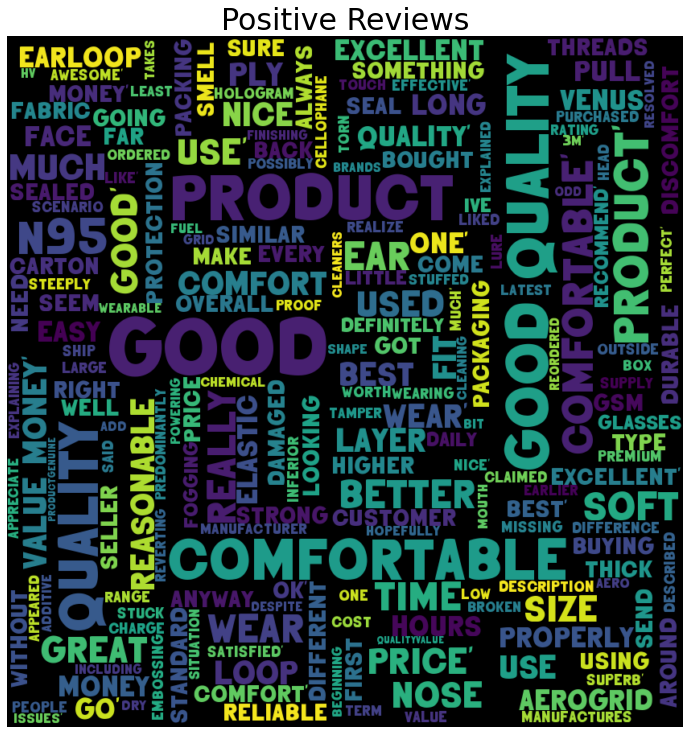

In [66]:
words = df_positive['reviews_clean']
font_path = 'Midnight.ttf'
mask = np.array(Image.open('cloud.png'))
mostcommon = FreqDist(words).most_common(100)
wordcloud = WordCloud(mask = mask, background_color = 'black', font_path = font_path, random_state = 42,
                      width = mask.shape[1], height = mask.shape[0]).generate(str(mostcommon))

fig = plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Reviews', fontsize=30)
plt.tight_layout(pad=0)
plt.show()



### Extract Only Certain Features: Nouns 

In [162]:
from nltk.tokenize import word_tokenize





def nouns(text):
    text = word_tokenize(text)
    text = nltk.pos_tag(text)
    text = [word for word,pos in text if (pos == 'NN')]
    # text = [ text if (pos == 'NN' or pos == 'NNS' or pos == 'NNP' or pos == 'NNSP' )]
    return text


df_positive['reviews_token'] = df_positive.reviews_clean.apply(nouns)
df_positive.head()

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_15410/3943562750.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['reviews_token'] = df_positive.reviews_clean.apply(nouns)


,reviews,reviews_clean,score,compound,sentiment,reviews_token
0,"\nOverall the masks are good, comfortable, sof...",overall good comfortable soft nose clip soft e...,"{'neg': 0.069, 'neu': 0.596, 'pos': 0.336, 'co...",0.8709,Positive,"[comfortable, clip, ear, fur, type, fabric, ti..."
1,\ngood\n,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive,[]
2,\nThe quality of this mask is good but not the...,quality good best,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",0.7964,Positive,"[quality, best]"
3,\nGood quality\n,good quality,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive,[quality]
4,\nGood product\n,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive,[product]


In [68]:
from pprint import pprint

df_positive_2 = df_positive.loc[df_positive.reviews_token.apply(lambda reviews: reviews !=[]),['reviews_token']]

df_positive_2['features'] = df_positive_2['reviews_token'].apply(clean_text)



common = pd.Series(' '.join(df_positive_2['features']).split()).value_counts()[:35]
print(common)


quality        1151
product         998
money           314
value           251
use             232
price           230
time            186
face            155
comfort         145
material        135
size            128
wear            111
protection      103
fit              94
air              84
head             82
design           76
layer            71
day              67
buy              67
t                66
loop             63
ply              62
n95              61
bit              59
clip             59
feel             59
comfortable      56
purchase         56
box              55
packaging        53
pack             53
order            53
ear              49
buying           48
dtype: int64


In [69]:
df_positive_2.head()

,reviews_token,features
0,"[comfortable, clip, ear, fur, type, fabric, ti...",comfortable clip ear fur type fabric time disc...
2,"[quality, best]",quality best
3,[quality],quality
4,[product],product
5,"[product, quality, vine, excellent]",product quality vine excellent


## Positive Reviews Topic Modeling Analysis - LDA: Clustering 

<b> What is Latent Dirichlet Allocation (LDA)? </b> 

LDA is a popular unsupervised machine learning model used to classify different topics found in a corpus. A corpus is a collection of machine-readable texts that have been produced in a natural communicative setting. [2] After text is preprocessed, we will used the tokened data to input into our model. We will count the term frequency of our corpus and then use it as our input data. We also created a dictionary for our term for our analysis after the modeling is done. 

We will use two differnet LDA packages. One is from genism and the other is from scikit learn. We will also preprocess our text slightly different for each. 

In [157]:


reviews = df_positive_2.reviews_token.values.tolist()

In [158]:

reviews = [str(r).split(',') for r in reviews]

In [159]:
id2word = Dictionary(reviews) 

In [160]:
#term frequency document 

corpus = [id2word.doc2bow(text) for text in reviews]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [161]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]


[[(" 'clip'", 1),
  (" 'discomfort'", 1),
  (" 'ear'", 1),
  (" 'fabric'", 1),
  (" 'fur'", 1),
  (" 'product'", 1),
  (" 'time'", 1),
  (" 'type'", 1),
  (" 'wear']", 1),
  ("['comfortable'", 1)]]

In [75]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=5, 
                   random_state=42,
                   chunksize=20,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.071*"[\'product\']" + 0.039*" \'air\'" + 0.029*"[\'wear\']" + 0.022*" '
  '\'weight\'" + 0.017*" \'help\'" + 0.015*" \'protection\']" + '
  '0.013*"[\'price\'" + 0.013*"[\'price\']" + 0.012*" \'doesnt\'" + 0.011*" '
  '\'layer\'"'),
 (1,
  '0.077*" \'product\'" + 0.060*"[\'quality\']" + 0.059*" \'time\'" + 0.032*" '
  '\'t\'" + 0.020*" \'doesn\'" + 0.018*" \'problem\'" + 0.017*" \'n95\'" + '
  '0.015*" \'dont\'" + 0.015*"[\'venus\'" + 0.013*" \'packaging\'"'),
 (2,
  '0.110*" \'quality\'" + 0.103*"[\'product\'" + 0.026*" \'price\'" + 0.025*" '
  '\'fit\'" + 0.021*" \'use\'" + 0.019*" \'material\']" + 0.013*" \'waste\'" + '
  '0.012*" \'fabric\'" + 0.011*" \'design\'" + 0.011*" \'size\']"'),
 (3,
  '0.114*"[\'quality\'" + 0.092*" \'size\'" + 0.038*" \'quality\']" + 0.022*" '
  '\'material\'" + 0.020*" \'medium\'" + 0.019*" \'child\'" + '
  '0.014*"[\'year\'" + 0.013*"[\'material\'" + 0.012*" \'year\'" + '
  '0.012*"[\'superb\'"'),
 (4,
  '0.075*" \'product\']" + 0.061*" \'mone

In [76]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)


\nCoherence Score:  0.5094668257601426


### Graph LDA 

In the commented code, is the package that allows us to visualize the data and the topic clusters. This visualization can be found in the powerpoint.

In [154]:
# pyLDAvis.enable_notebook()
# p = gensimvis.prepare(lda_model, corpus, id2word)
# p

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorization - converts text to numeric ie vector form 

vectorizer = CountVectorizer(max_df=0.9, min_df=2)
# apply transformation  - tf is term_frequency 
df_positive_2['reviews_token'] = df_positive_2.reviews_token.apply(lambda x: str(x))
tf = vectorizer.fit_transform(df_positive_2['reviews_token']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()


In [79]:
from sklearn.decomposition import LatentDirichletAllocation #LDA

number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics,max_iter = 100, random_state=42)

In [80]:
model.fit(tf)

LatentDirichletAllocation(max_iter=100, n_components=5, random_state=42)

In [81]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [82]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,use,233.2,size,120.0,money,316.2,product,1001.2,quality,1152.2
1,wear,84.6,face,119.3,value,251.2,time,70.8,price,230.2
2,day,67.2,fit,95.2,comfort,85.7,delivery,30.8,time,81.0
3,air,45.6,clip,59.2,buy,67.2,box,29.9,protection,77.0
4,face,36.1,buying,48.2,head,50.7,superb,29.4,comfort,63.6
5,layer,36.0,ok,45.2,comfortable,50.0,worth,28.9,loop,63.2
6,pack,35.8,material,43.4,band,25.6,please,27.6,ply,62.2
7,doesnt,35.5,n95,39.0,way,24.2,dont,25.6,purchase,56.2
8,smell,34.2,fabric,36.2,bit,24.1,n95,22.4,material,44.6
9,package,30.2,year,34.2,material,23.6,cost,19.8,order,42.1


### Positive Review Analysis

We some that some of the key features are: 
   1. importance are the size of the product how it fits, the fabric, material and type. 
   
   2. The everyday use of the product 
   
   3. how much it cost and if it is a good value for material
   
   4. product delievry, packaging  and time
   
   5. Quality - this is similar to the themes above
    
This part of the project told use that the quality of a good price is important and promote positive sentiment, the time and delivery affect sentiment, and the material used. 

### Negative Reviews Topic Modeling Analysis - LDA: Clustering 

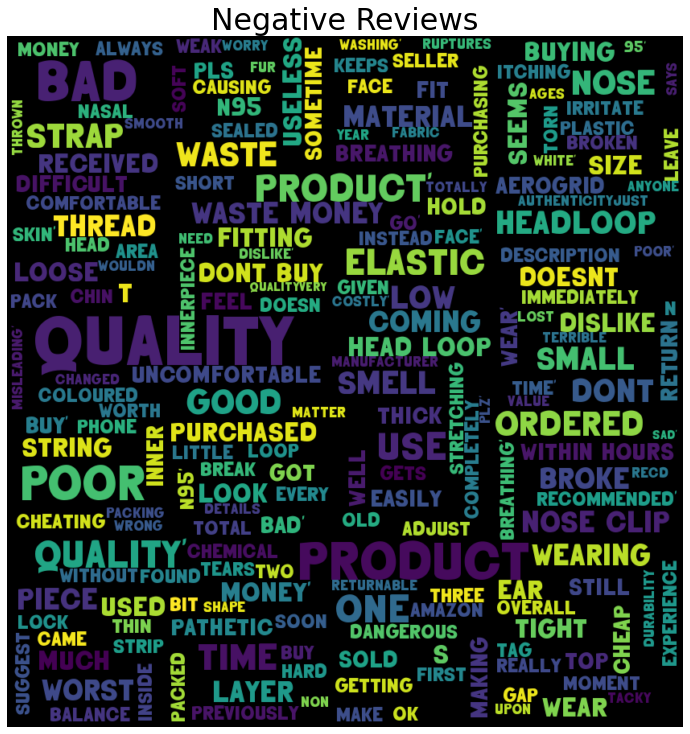

In [83]:
words = df_negative['reviews_clean']



mostcommon = FreqDist(words).most_common(100)

wordcloud = WordCloud(mask = mask, background_color = 'black', font_path = font_path, random_state = 42, 
                      width = mask.shape[1], height = mask.shape[0]).generate(str(mostcommon))


fig = plt.figure(figsize= (30,10))
plt.imshow(wordcloud,interpolation="bilinear" )
plt.axis('off')                  
plt.title('Negative Reviews', fontsize=30)
plt.tight_layout(pad=0)
plt.show()          
                      

### Extract Only Certain Features: Nouns 

In [95]:
from nltk.tokenize import word_tokenize
def nouns(text):
    text = word_tokenize(text)
    text = nltk.pos_tag(text)
    text = [word for word,pos in text if (pos == 'NN')]
    # text = [ text if (pos == 'NN' or pos == 'NNS' or pos == 'NNP' or pos == 'NNSP' )]
    return text


df_negative['reviews_token'] = df_negative.reviews_clean.apply(nouns)

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_15410/2713770052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['reviews_token'] = df_negative.reviews_clean.apply(nouns)


In [96]:
df_negative.head()

,reviews,reviews_clean,score,compound,sentiment,reviews_token
21,"\nNothing to claim to be an excellent product,...",nothing claim excellent product good enough,"{'neg': 0.303, 'neu': 0.404, 'pos': 0.293, 'co...",-0.0253,Negative,"[nothing, claim, product]"
100,\nIt's good not disappointed\n,good disappointed,"{'neg': 0.517, 'neu': 0.0, 'pos': 0.483, 'comp...",-0.0516,Negative,[]
127,\nThe overall product quality is satisfactory....,overall product quality satisfactory however f...,"{'neg': 0.23, 'neu': 0.672, 'pos': 0.099, 'com...",-0.7818,Negative,"[product, quality, found, spandex, hook, guess..."
150,\nQuality of the mask may be okay. But straps ...,quality may okay straps poor quality tend beco...,"{'neg': 0.353, 'neu': 0.523, 'pos': 0.124, 'co...",-0.5423,Negative,"[quality, quality, position]"
152,\nFirst purchase I got very soft inner layer a...,first purchase got soft inner layer band also ...,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",-0.3818,Negative,"[purchase, layer, band, purchase, layer, isnt,..."


In [101]:
from pprint import pprint

df_negative_2 = df_negative.loc[df_negative.reviews_token.apply(lambda reviews: reviews !=[]),['reviews_token']]

df_negative_2['features'] = df_negative_2['reviews_token'].apply(clean_text)



common = pd.Series(' '.join(df_negative_2['features']).split()).value_counts()[:35]
print(common)

quality        302
product        196
money           74
time            63
waste           60
use             49
buy             41
dont            38
material        37
size            32
face            29
smell           28
layer           28
head            26
t               23
loop            23
strap           23
wear            22
doesnt          20
pack            18
box             18
clip            18
packaging       17
dislike         17
packet          16
ply             15
return          15
air             15
price           15
pain            14
fit             14
description     13
ear             12
problem         12
n95             12
dtype: int64


In [135]:
reviews = df_negative_2.reviews_token.values.tolist()
reviews = [str(r).split(',') for r in reviews]

In [136]:
id2word = Dictionary(reviews) 

In [137]:
#term frequency document 

corpus = [id2word.doc2bow(text) for text in reviews]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [138]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]


[[(" 'claim'", 1), (" 'product']", 1), ("['nothing'", 1)]]

In [139]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=7, 
                   random_state=42,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.150*"[\'quality\']" + 0.035*" \'son\'" + 0.032*" \'size\']" + 0.032*" '
  '\'material\']" + 0.024*" \'pin\'" + 0.023*" \'money\'" + 0.020*" '
  '\'fabric\'" + 0.019*"[\'plastic\'" + 0.015*"[\'yearsand\'" + '
  '0.015*"[\'waste\'"'),
 (1,
  '0.047*" \'time\'" + 0.046*" \'use\'" + 0.040*" \'quality\']" + 0.024*" '
  '\'packet\'" + 0.023*" \'wash\'" + 0.021*"[\'fitting\'" + 0.020*" '
  '\'plastic\'" + 0.019*" \'return\'" + 0.019*"[\'iam\'" + 0.016*" \'thz\']"'),
 (2,
  '0.052*" \'product\'" + 0.051*"[\'quality\'" + 0.048*" \'waste\'" + 0.036*" '
  '\'money\'" + 0.032*" \'point\'" + 0.030*" \'ok\']" + 0.029*" \'buy\']" + '
  '0.029*" \'strap\'" + 0.021*" \'money\']" + 0.019*" \'dont\'"'),
 (3,
  '0.037*"[\'seller\'" + 0.037*" \'worry\'" + 0.037*" \'manufacturer\'" + '
  '0.037*" \'authenticityjust\']" + 0.035*" \'packaging\'" + 0.032*" \'year\'" '
  '+ 0.030*" \'use\'" + 0.022*" \'size\'" + 0.021*" \'picture\'" + 0.018*" '
  '\'design\'"'),
 (4,
  '0.122*"[\'quality\'" + 0.064*" 

In [140]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)


\nCoherence Score:  0.6067209979542297


In [141]:
# pyLDAvis.enable_notebook()
# p = gensimvis.prepare(lda_model, corpus, id2word)
# p

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorization - converts text to numeric ie vector form 
# Token_Pattern - Regular expression denoting what constitutes a “token”

#vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
vectorizer = CountVectorizer(max_df=0.9, min_df=2)

# apply transformation  - tf is term_frequency 
df_negative_2['reviews_token'] = df_negative_2.reviews_token.apply(lambda x: str(x))
tf = vectorizer.fit_transform(df_negative_2['reviews_token']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()


In [143]:
from sklearn.decomposition import LatentDirichletAllocation #LDA

number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics,max_iter=100, random_state=42)

In [144]:
model.fit(tf)

LatentDirichletAllocation(max_iter=100, n_components=5, random_state=42)

In [145]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [146]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,loop,23.2,quality,253.7,time,52.4,layer,28.2,product,151.6
1,doesnt,20.2,buy,31.4,product,45.8,material,25.2,money,74.2
2,head,19.9,size,23.1,smell,22.6,use,22.1,waste,60.2
3,dislike,16.1,face,19.6,packet,16.2,strap,13.0,quality,48.7
4,fit,14.2,use,19.4,problem,12.2,pain,11.2,dont,21.5
5,ear,12.2,ply,14.2,price,10.2,time,11.0,box,18.2
6,wear,11.2,dont,12.9,return,8.7,air,10.2,pack,14.2
7,picture,11.2,n95,12.2,bit,8.2,feel,8.2,material,12.1
8,clip,9.7,piece,9.2,breath,8.1,value,8.2,packaging,11.8
9,strap,6.1,pls,8.2,use,8.1,protection,8.2,wear,11.2


### Negative Review Analysis

There were similar topics to the positive reviews found in the negative reviews. 

Some key unlying topics were: 
   1. The fit and size of the product
   2. The quality and material 
   3. The pricing for the product
   4. Packaging 
   5. Everyday use

### Final Analysis

Amazon scraping product feature analysis can be a powerful tool for both consumers and businesses. We were able to identify important topics over thousands of reviews on multiple face mask. There are a wide range of features that are important to customers. From the packaging to the ability to wear it every day. These insights can help producers make more insightful business decision across varies departments in their companies.

sources:


    * https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
    * https://www.oreilly.com/library/view/natural-language-annotation/9781449332693/ch01.html
    *https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/#:~:text=LDA%20operates%20in%20the%20same,is%20a%20matrix%20factorization%20technique.
